## In_Depth_RandomForest_Regression:

In [10]:
# Importing libraries:

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestRegressor

<ErrorbarContainer object of 3 artists>

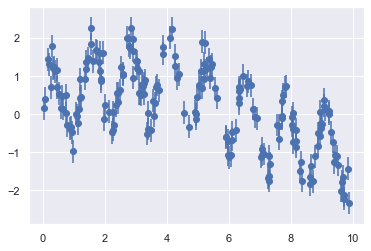

In [8]:
# Initializing dataset:

rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma = 0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt = 'o')

In [11]:
# Building RandomForestRegressor model object:

forest = RandomForestRegressor(200)

In [12]:
# Fitting the model:

forest.fit(x[:, None], y)

RandomForestRegressor(n_estimators=200)

In [16]:
# Predicting with the model:

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma = 0)

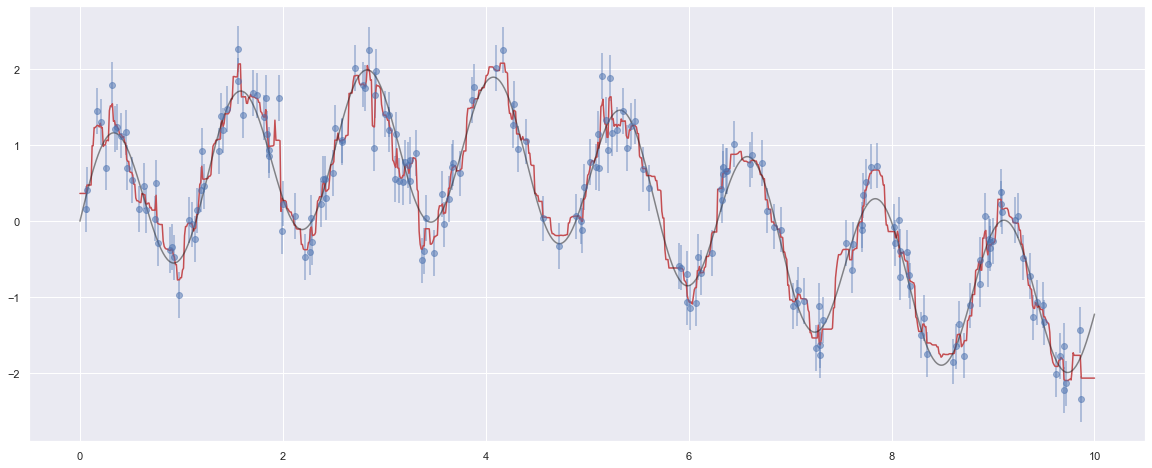

In [23]:
# Plotting the predictions:

plt.figure(figsize = (20, 8))
plt.errorbar(x, y, 0.3, fmt = 'o', alpha = 0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha = 0.5)

## Random Forest for Classifying Digits:

In [50]:
# Importing libraries:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
# Loading the dataset:

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

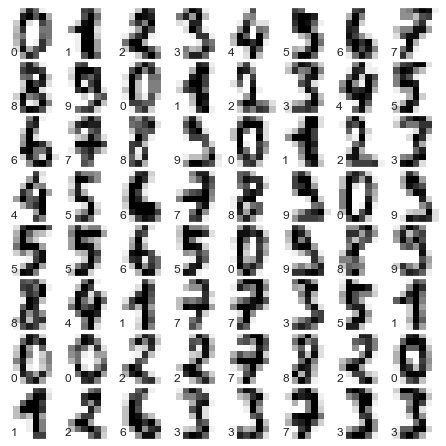

In [31]:
# Visualizing the first digits from tha dataset:

# Setup the figure:
fig = plt.figure(figsize = (6, 6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

# Plot the digits: each image is  8x8 pixels:
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    
# Label the image wiht the target value:
    ax.text(0, 7, str(digits.target[i]))

In [38]:
# Splitting the dataset:

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0)

In [40]:
# Building RandomForestRegressor model object:

model = RandomForestRegressor(n_estimators = 1000)

In [41]:
# Fitting the model:

model.fit(Xtrain, ytrain)

RandomForestRegressor(n_estimators=1000)

In [42]:
# Predicting with the model:

ypred = model.predict(Xtest)

In [ ]:
# Printing the classification report:

#print(metrics.classification_report(ypred, ytest))
# This does not work with regression. Continue to learn and find a solution.

In [ ]:
# Printing the confusion matrix:

#mat = confusion_matrix(ytest, ypred)

#sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
#plt.xlabel('True Label')
#plt.ylabel('Predicted Label')
# This does not work with regression. Continue to learn and find a solution